<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/VietNamese_BankNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [5]:
## tạo dữ liệu để train
folder = '/content/drive/MyDrive/MyPicture/Money_Data/money_train/'
moneys_train, names_train = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('200'):
    output=1.0
  if file.startswith('500'):
    output=2.0
  if file.startswith('1000'):
    output=3.0
  if file.startswith('2.000'):
    output=4.0
  if file.startswith('5.000'):
    output=5.0
  if file.startswith('10.000'):
    output=6.0
  if file.startswith('20.000'):
    output=7.0
  if file.startswith('50.000'):
    output=8.0
  if file.startswith('100.00'):
    output=9.0
  if file.startswith('200.000'):
    output=10.0
  if file.startswith('500.000'):
    output=11.0
  
  photo = load_img(folder + file)
  photo = img_to_array(photo)
  moneys_train.append(photo)
  names_train.append(output)
moneys_train = asarray(moneys_train)
names_train = asarray(names_train)
print(moneys_train.shape, names_train.shape)
save('/content/drive/MyDrive/MyPicture/Money_Data/money_tr.npy',moneys_train)
save('/content/drive/MyDrive/MyPicture/Money_Data/name_tr.npy',names_train)

(2375, 144, 192, 3) (2375,)


In [6]:
## tạo dữ liệu để train
folder = '/content/drive/MyDrive/MyPicture/Money_Data/money_test/'
moneys_test, names_test = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('200'):
    output=1.0
  if file.startswith('500'):
    output=2.0
  if file.startswith('1000'):
    output=3.0
  if file.startswith('2.000'):
    output=4.0
  if file.startswith('5.000'):
    output=5.0
  if file.startswith('10.000'):
    output=6.0
  if file.startswith('20.000'):
    output=7.0
  if file.startswith('50.000'):
    output=8.0
  if file.startswith('100.00'):
    output=9.0
  if file.startswith('200.000'):
    output=10.0
  if file.startswith('500.000'):
    output=11.0
  
  photo = load_img(folder + file)
  photo = img_to_array(photo)
  moneys_test.append(photo)
  names_test.append(output)
moneys_test = asarray(moneys_test)
names_test = asarray(names_test)
print(moneys_test.shape, names_test.shape)
save('/content/drive/MyDrive/MyPicture/Money_Data/money_test.npy',moneys_test)
save('/content/drive/MyDrive/MyPicture/Money_Data/name_test.npy',names_test)

(375, 144, 192, 3) (375,)


In [7]:
moneys_train = moneys_train.astype('float')/255.0
moneys_test = moneys_test.astype('float')/255.0

In [8]:

from keras.utils import to_categorical

names_train = to_categorical(names_train)
names_test = to_categorical(names_test)

print(names_train.shape)
print(names_test.shape)

(2375, 12)
(375, 12)


In [16]:
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Normalization, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import LeakyReLU


############## 
batch_size=64
epochs =30
classes =12

In [17]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(144,192,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
     

In [18]:
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 144, 192, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 144, 192, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 72, 96, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 96, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 72, 96, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 48, 64)       0         
 2D)                                                  

In [20]:
train = model.fit(moneys_train, names_train, batch_size, epochs=epochs, verbose=1)

Epoch 1/30
38/38 [==============================] - 3s 64ms/step - loss: 1.8686 - accuracy: 0.4067
Epoch 2/30
38/38 [==============================] - 2s 63ms/step - loss: 0.4885 - accuracy: 0.8232
Epoch 3/30
38/38 [==============================] - 2s 63ms/step - loss: 0.2299 - accuracy: 0.9107
Epoch 4/30
38/38 [==============================] - 3s 66ms/step - loss: 0.2003 - accuracy: 0.9225
Epoch 5/30
38/38 [==============================] - 3s 68ms/step - loss: 0.1089 - accuracy: 0.9600
Epoch 6/30
38/38 [==============================] - 2s 64ms/step - loss: 0.0406 - accuracy: 0.9857
Epoch 7/30
38/38 [==============================] - 2s 64ms/step - loss: 0.0196 - accuracy: 0.9941
Epoch 8/30
38/38 [==============================] - 2s 64ms/step - loss: 0.0116 - accuracy: 0.9983
Epoch 9/30
38/38 [==============================] - 2s 64ms/step - loss: 0.0058 - accuracy: 0.9987
Epoch 10/30
38/38 [==============================] - 3s 67ms/step - loss: 0.0061 - accuracy: 0.9992
Epoch 11/

<ipython-input-21-adffadd532a2>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


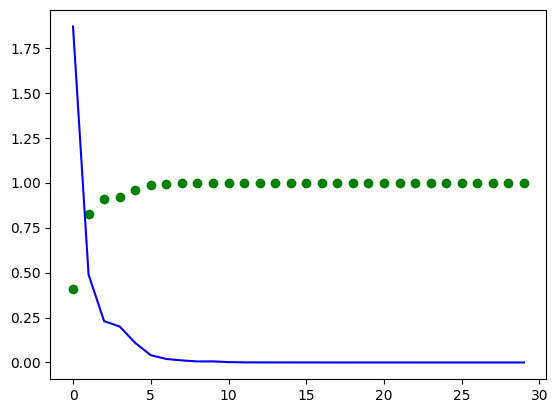

In [21]:

model.save('/content/drive/MyDrive/MyPicture/Money_Data/model_money.h5')
accuracy =train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 21ms/step
Predicted:  200


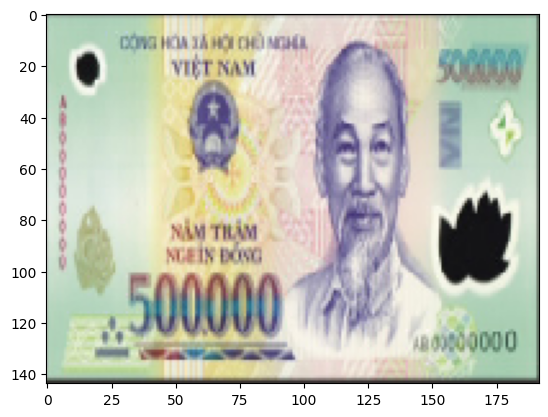

In [24]:
name={1:'200', 2:'500',3:'1.000',4:'2.000',5:'5.000',6:'10.000',7:'20.000',8:'50.000',9:'100.000',10:'200.000',11:'500.000'}
#test
import numpy as np
filePath = '/content/drive/MyDrive/MyPicture/Money_Data/338348.jpg'
testImage = load_img(filePath, target_size=(144,192))
arrayImage = img_to_array(testImage).reshape(1,144,192,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)
